## 회귀(regression) 및 예측 모델

- 지도학습
- 연속형 데이터를 사용해서 수치를 예측
- 예
 + 암 환자의 생존시간 예측
 + 공부시간에 따른 성적 예측
 + 식사량에 따른 체중 예측
- 데이터: 연속형 데이터

In [ ]:
# 1.선형 회귀(Linear Regression)
#  - 대표적인 회귀 알고리즘
#  - 비교적 간단하고 성능이 뛰어남

# 생선(농어)의 길이로 무게를 예측하는 모델

In [3]:
##################
# 1. 데이터 로드 #
##################

# 데이터: http://bit.ly/perch_data

import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
##################
# 2. 데이터 확인 #
##################

print(len(perch_length))
print(len(perch_weight))

56
56


In [12]:
###############################
# 3. 데이터 분할(train, test) #
###############################
# - train, test 데이터 분할

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(perch_length, perch_weight, random_state=42)

print(len(x_train) ,len(y_train))
print(len(x_test) ,len(y_test))

42 42
14 14


In [10]:
x_train

array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
       22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
       36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
       22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5])

In [11]:
# 2차원 데이터 변경
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
x_train

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ],
       [25. ],
       [40. ],
       [39. ],
       [43. ],
       [22. ],
       [20. ],
       [22. ],
       [24. ],
       [27.5],
       [43. ],
       [40. ],
       [24. ],
       [21. ],
       [27.5],
       [40. ],
       [32.8],
       [26.5],
       [36.5],
       [13.7],
       [22.7],
       [15. ],
       [37. ],
       [35. ],
       [28.7],
       [23.5],
       [39. ],
       [21. ],
       [23. ],
       [22. ],
       [44. ],
       [22.5],
       [19. ],
       [37. ],
       [22. ],
       [25.6],
       [42. ],
       [34.5]])

In [18]:
################
# 4. 모델 학습 #
################
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성
lr = LinearRegression()

# 모델 훈련
lr.fit(x_train, y_train)

# 모델 예측
# - 50cm 농어의 무게를 예측
print(f"50cm 농어의 무게는? {lr.predict([[50]])}")

# 학습  파라미터
# - weight: coef_(기울기)
# - bias: bias(절편)
print(f"weight: {lr.coef_}, bias: {lr.intercept_}")

ValueError: Expected 2D array, got 1D array instead:
array=[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

AttributeError: 'LinearRegression' object has no attribute 'coef_'

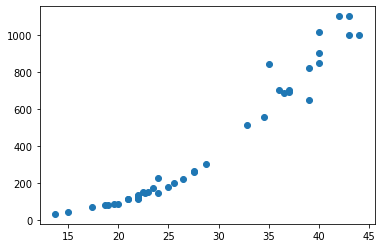

In [22]:
####################
# 5. 데이터 시각화 #
####################
import matplotlib.pyplot as plt

# 산점도(농어 길이, 무게)
plt.scatter(x_train, y_train)

# 모델이 학습한 선형
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

plt.scatter(50, 1241.8, marker="^")
# x축 제목
plt.xlable("lenght")
# y축 제목
plt.xlable("weight")
# 그래프 그리기!
plt.show()